# <p align='center'>МУ к КР №3 Диагностика моделей</p>

In [131]:
import numpy as np

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (
    train_test_split, cross_val_score, cross_validate,
    KFold, StratifiedKFold, LeaveOneOut, LeavePOut,
)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score, precision_recall_curve, auc,
    mean_squared_error, r2_score,
)
from yellowbrick.model_selection import LearningCurve

from matplotlib import pyplot as plt
import seaborn as sns

In [61]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# <p align='center' style='color: #6c89c6;'>Работу выполнил: Таратин Артём ПМ22-1</p><hr>

## Цель работы

* Проверить освоение студентами методы оценки и диагностики моделей машинного обучения.

## Методические указания

* Контрольная работа выполняется в аудитории. В начале занятия преподаватель распределяет по студентам датасеты (задания). Распределение должно проходить случайным образом.
* После получения задания студенты выполняют работу на лабораторных компьютерах. Работа должна быть выполнена студентом самостоятельно. Работа выполняется в виде ноутбука формата и названия файла: Фамилия_группа.ipynb (Иванов_ПМ22-1.ipynb)
* После завершения выполнения работы студент должен сдать работу преподавателю. Работы сдаются в электронном виде с корпоративной почты студента на корпоративную почту преподавателя. Работа должна быть сдана не позже окончания аудиторного занятия.
* Контрольная работа выполняется на лабораторный компьютерах.
* Во время выполнения работы можно пользоваться всем (документацией, прошлыми работами, Интернетом), кроме помощи других студентов, работа выполняется самостоятельно.

## Критерии оценки

1. Код должен выполняться без ошибок. Программные ошибки - сразу 0 баллов.
2. Код должен содержать пояснения в виде ячеек с текстом. В пояснениях нужно писать значимые выводы по ходу выполнения работы.
3. Все графики должны быть правильно подписаны и понятны.
4. Текстовый вывод должен быть нагляден и отформатирован. Численные значения - округлены до разумного количества значащих цифр.

<hr>

## Содержание работы

1. (1 балл) Загрузите предложенный вам датасет с помощью функции `sklearn.datasets.fetch_openml`. Выведите текстовое описание загруженного датасета. Определите какая бизнес-задача ставится. Переведите бизнес-задачу в задачу машинного обучения.

In [3]:
data = fetch_openml('pc1_req')
print(data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:

Downloaded from openml.org.


2. (1 балл) Проведите предварительный анализ датасета.  Выведите основную статистическую информацию о данных. Проверьте дисбаланс целевого признака.

In [4]:
dataset = data.frame
print(data.target_names)
dataset.head()

['DEFECT']


,ACTION,CONDITIONAL,CONTINUANCE,IMPERATIVE,OPTION,RISK_LEVEL,SOURCE,WEAK_PHRASE,DEFECT
0,1,1,0,0,0,1,1,0,Y
1,1,0,0,0,0,1,2,0,Y
2,1,1,0,1,0,1,1,0,Y
3,2,0,1,1,0,2,1,0,Y
4,3,1,1,1,0,2,1,0,Y


In [5]:
dataset.dtypes

ACTION            int64
CONDITIONAL       int64
CONTINUANCE       int64
IMPERATIVE        int64
OPTION         category
RISK_LEVEL        int64
SOURCE            int64
WEAK_PHRASE       int64
DEFECT         category
dtype: object

In [6]:
dataset.describe()

,ACTION,CONDITIONAL,CONTINUANCE,IMPERATIVE,RISK_LEVEL,SOURCE,WEAK_PHRASE
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,1.659375,0.234375,0.665625,0.815625,1.625000,2.071875,0.012500
std,0.976000,0.424271,0.894466,0.885484,0.732154,2.033687,0.136572
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000
75%,2.000000,0.000000,1.000000,1.000000,2.000000,2.000000,0.000000
max,6.000000,1.000000,5.000000,5.000000,3.000000,23.000000,2.000000


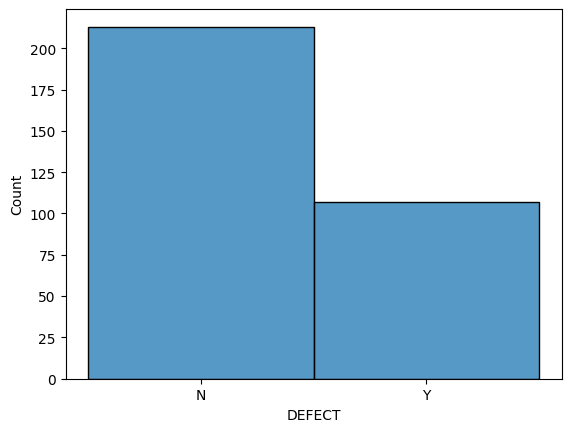

In [7]:
sns.histplot(dataset.DEFECT)
plt.show()

3. (1 балл) Убедитесь, что данные пригодны для моделирования. В данных не должно быть пропущенных значений, все признаки должны быть численными. Если эти условия нарушаются, исправьте это.

In [8]:
dataset.dtypes

ACTION            int64
CONDITIONAL       int64
CONTINUANCE       int64
IMPERATIVE        int64
OPTION         category
RISK_LEVEL        int64
SOURCE            int64
WEAK_PHRASE       int64
DEFECT         category
dtype: object

In [9]:
dataset.OPTION = dataset.OPTION.astype(int)
dataset.dtypes

ACTION            int64
CONDITIONAL       int64
CONTINUANCE       int64
IMPERATIVE        int64
OPTION            int64
RISK_LEVEL        int64
SOURCE            int64
WEAK_PHRASE       int64
DEFECT         category
dtype: object

In [10]:
dataset.isna().sum()

ACTION         0
CONDITIONAL    0
CONTINUANCE    0
IMPERATIVE     0
OPTION         0
RISK_LEVEL     0
SOURCE         0
WEAK_PHRASE    0
DEFECT         0
dtype: int64

In [11]:
le = LabelEncoder()
dataset.DEFECT = le.fit_transform(dataset.DEFECT)
dataset.head()

,ACTION,CONDITIONAL,CONTINUANCE,IMPERATIVE,OPTION,RISK_LEVEL,SOURCE,WEAK_PHRASE,DEFECT
0,1,1,0,0,0,1,1,0,1
1,1,0,0,0,0,1,2,0,1
2,1,1,0,1,0,1,1,0,1
3,2,0,1,1,0,2,1,0,1
4,3,1,1,1,0,2,1,0,1


4. (1 балл) Обучите любую линейную модель, которая решает поставленную задачу. Выведите с помощью метода `score()` результат метрики оценки модели. Опишите какая метрика подсчитывается в методе `score()`.

In [12]:
X, y = dataset.drop('DEFECT', axis=1), dataset.DEFECT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
clf = LogisticRegression().fit(X_train, y_train)
clf.score(X_test, y_test)

0.671875

> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; LogisticRegression().score(...) = sklearn.metrics.accuracy_score(...)

5. (1 балл) К поставленной задачи машинного обучения подберите еще 3 метрики. С помощью их оцените обученную линейную модель.

In [14]:
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.27586206896551724, 0.4, 0.21052631578947367)

<Axes: >

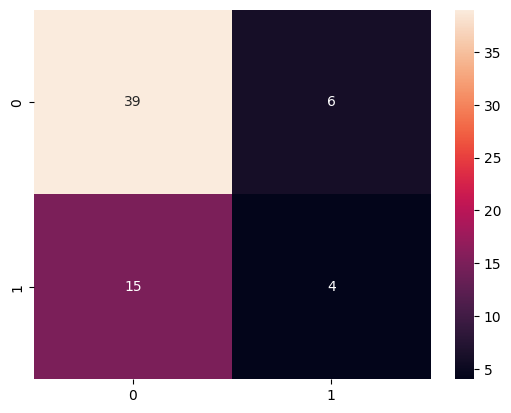

In [15]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

6. (1 балл) Для задач классификации: Постройте для этой модели кривые ROC. Вычислите для этой модели метрики площади под кривыми ROC-AUC. Найдите оптимальное значения порога модели.

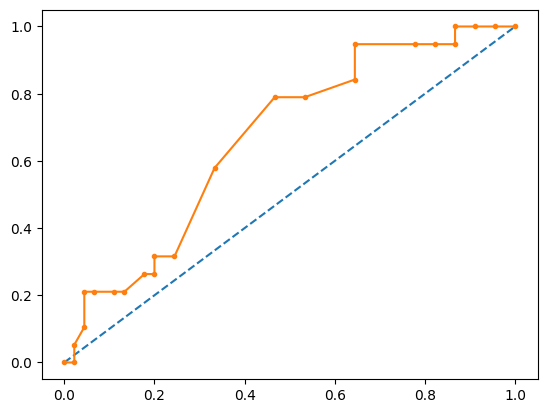

In [16]:
y_pred_proba = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [17]:
ras = roc_auc_score(y_test, y_pred_proba[:, 1])
ras

0.6690058479532164

In [18]:
threshold_opt = thresholds[np.argmax(tpr - fpr)]
threshold_opt

0.336297722314936

6. (1 балл) Для задач регрессии: Постройте совместное распределение теоретических и эмпирических значений целевой переменной. Сделайте вывод о наличии либо отсутствии систематической компоненты в отклонениях, их общей величине.

In [19]:
# k = 1000
# X = np.linspace(0, 100, k)
# y = X * 2 + 0.5 + np.random.random(k) * 5
# X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y.reshape(-1, 1), test_size=0.2)
# model = LinearRegression().fit(X_train, y_train)
# y_pred = model.predict(X_test)

# ...

# fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

# ax[0].scatter(y_pred, y_test, alpha=0.5)
# ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# ax[0].set_xlabel('Предсказанные значения')
# ax[0].set_ylabel('Реальные значения')
# ax[0].set_title('Совместное распределение теоретических и эмпирических значений')

# errors = y_pred - y_test
# ax[1].hist(errors, bins=25, edgecolor='k', alpha=0.7)
# ax[1].set_xlabel('Ошибка предсказания')
# ax[1].set_ylabel('Частота')
# ax[1].set_title('Гистограмма ошибок предсказания')

# fig.tight_layout()
# plt.show()

In [20]:
# mean_squared_error(y_test, y_pred)

7. (1 балл) Для задач классификации: Постройте для этой модели кривые PR. Вычислите для этой модели метрики площади под кривыми PR-AUC. Найдите оптимальное значения порога модели.

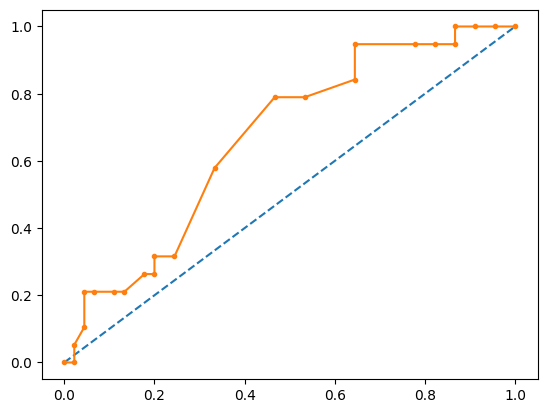

In [21]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [22]:
pr_auc = auc(recall, precision)
pr_auc

0.407192103727609

In [23]:
f1 = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1[:-1])]
optimal_threshold

/var/folders/02/6cj0f5qn4y30_4fdyfzy3vnh0000gn/T/ipykernel_40920/3943431720.py:1: RuntimeWarning: invalid value encountered in divide
  f1 = 2 * (precision * recall) / (precision + recall)


0.7781117359324821

7. (1 балл) Для задач регрессии: Постройте ту же модель, но с предварительной нормализацией значений признаков. Сделайте вывод о влиянии нормализации на качество работы модели.

In [24]:
# k = 1000
# X = np.linspace(0, 100, k)
# y = X * 2 + 0.5 + np.random.random(k) * 5
# X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y.reshape(-1, 1), test_size=0.2)
# model = LinearRegression().fit(X_train, y_train)
# y_pred = model.predict(X_test)

# ...

# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('logreg', LinearRegression())
# ]).fit(X_train, y_train)
# y_pred = pipeline.predict(X_test)

In [25]:
# mean_squared_error(y_test, y_pred)

8. (1 балл) Обоснуйте выбор типа разбиения данных при кросс-валидации для вашей задачи машинного обучения. Обучите любую другую модель используя кросс-валидацию данных.

* K-Fold: Общие задачи классификации, когда данных достаточно и нет строгих требований к времени обучения. Обеспечивает хорошее сочетание эффективности и надежности оценки.
* Stratified K-Fold: Задачи классификации с несбалансированными классами. Гарантирует, что соотношение классов сохраняется в каждом фолде, обеспечивая более точную оценку модели.
* Leave-One-Out (LOO): Задачи с очень малым количеством данных, где каждое наблюдение важно для оценки. Времязатратно и ресурсоемко, но может дать наиболее точную оценку.
* Leave-P-Out (LPO): Похож на LOO, но исключает из обучающего набора P наблюдений за раз. Используется редко, может быть полезен в специфических ситуациях с небольшими данными.

In [141]:
model = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(5)
cvs = cross_val_score(model, X, y, cv=skf, scoring='f1_macro')
cvs.mean()

0.5552865461172394

In [142]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_train, model.predict(X_train)), f1_score(y_test, model.predict(X_test))

(0.6330935251798561, 0.25806451612903225)

9. (2 балл) Проведите диагностику любой модели. Постройте кривые обучения. Сделайте вывод о переобученности или недообученности модели.

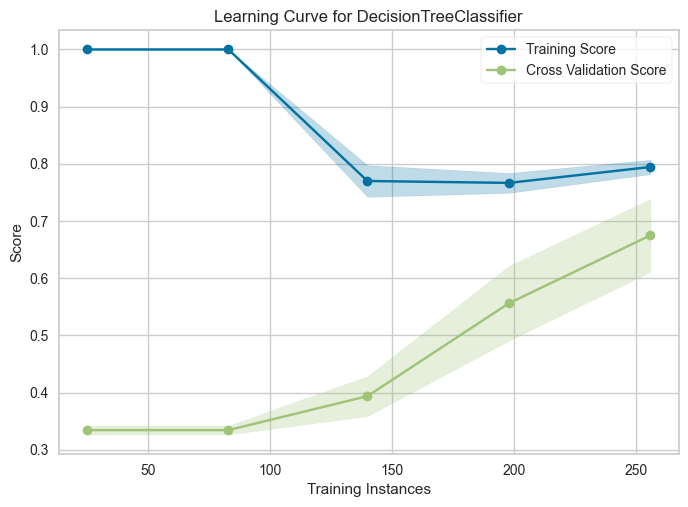

In [143]:
visualizer = LearningCurve(
    model, scoring='accuracy',
).fit(X, y).show()

10. (2 балл) Исследуйте как любой из гиперпараметров модели влияет на эффективность модели.

In [149]:
models_scores = [
    cross_val_score(
        DecisionTreeClassifier(max_depth=i),
        X, y, cv=skf, scoring='f1_macro',
    ).mean()
    for i in (1, 2, 4, 7, 10)
]
models_scores

[0.3996120613648386,
 0.4816807888723563,
 0.5206347908345699,
 0.5456203635033983,
 0.5508048874250544]